In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Read in the data
path_to_OpenMedic = "OpenMedic/OPEN_MEDIC_2022.CSV"
df_openmedic = pd.read_csv(path_to_OpenMedic, sep=";", encoding="ISO-8859-1")

print(df_openmedic.columns)
df_openmedic.head()

Index(['ATC1', 'l_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4',
       'ATC5', 'L_ATC5', 'CIP13', 'l_cip13', 'TOP_GEN', 'GEN_NUM', 'age',
       'sexe', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE'],
      dtype='object')


,ATC1,l_ATC1,ATC2,L_ATC2,ATC3,L_ATC3,ATC4,L_ATC4,ATC5,L_ATC5,...,l_cip13,TOP_GEN,GEN_NUM,age,sexe,BEN_REG,PSP_SPE,BOITES,REM,BSE
0,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,25MG CPR 200",0,0,0,1,5,99,17,"8,09","28,69"
1,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,25MG CPR 200",0,0,0,1,11,99,24,"9,29","30,96"
2,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,25MG CPR 200",0,0,0,1,44,99,20,"8,39","25,80"
3,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,25MG CPR 200",0,0,0,1,84,99,13,"5,03","16,77"
4,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,25MG CPR 200",0,0,0,1,99,1,14,"5,42","18,06"


In [5]:
path_to_MedicAm = "Medic'AM/2022-medic-am-par-type-de-prescripteur_serie-annuelle.xls"
dict_df_medicam = pd.read_excel(path_to_MedicAm,sheet_name=['MedicAM_2022_tous_presc','MedicAM_2022_presc_ville','MedicAM_2022_presc_hopital'])

MedicAM_2022_presc_hopital = dict_df_medicam.get('MedicAM_2022_presc_hopital')
MedicAM_2022_presc_ville = dict_df_medicam.get('MedicAM_2022_presc_ville')
MedicAM_2022_tous_presc = dict_df_medicam.get('MedicAM_2022_tous_presc')

print(MedicAM_2022_presc_hopital.columns)

Index(['CIP13', 'NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code\nATC', 'Classe\nATC', 'Code\nATC 2', 'Libellé\nATC 2',
       'Base de remboursement 2022', 'Nombre de boites remboursées \n2022',
       'Montant remboursé \n2022'],
      dtype='object')


In [11]:
MedicAM_2022_presc_hopital.head()

,CIP13,NOM COURT,PRODUIT,Code EphMRA,Classe EphMRA,Code\nATC,Classe\nATC,Code\nATC 2,Libellé\nATC 2,Base de remboursement 2022,Nombre de boites remboursées \n2022,Montant remboursé \n2022
0,3400921604696,"YELLOX 0,9MG/ML COLLY FL5ML 1",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC,S01,MEDICAMENTS OPHTALMOLOGIQUES,57463.77,15834,3.950864e+04
1,3400921609080,"AVONEX 0,03MG/0,5ML SOL INJ STYLO 4",AVONEX,L03B2,"INTERFERONS, BETA",L03AB07,INTERFERON BETA-1A,L03,IMMUNOSTIMULANTS,8706501.83,13689,8.621271e+06
2,3400921610550,POLYGYNAX VIRGO CAPSULE VAGINALE 6,POLYGYNAX VIRGO CAPSULE VAGINALE,G01B,ANTIFONGIQUES GYNECOLOGIQUES,G01AA51,NYSTATINE EN ASSOCIATION,G01,ANTIINFECTIEUX ET ANTISEPTIQUES A USAGE GYNECO...,5972.50,2231,1.207972e+03
3,3400921610840,NICORANDIL SDZ 20MG CPR 30,NICORANDIL SDZ,C01D,"THERAPEUTIQUE CORONARIENNE, ANTAGONISTES CALCI...",C01DX16,NICORANDIL,C01,MEDICAMENTS EN CARDIOLOGIE,11555.85,1879,1.118131e+04
4,3400921611731,NICORANDIL SDZ 10MG CPR 30,NICORANDIL SDZ,C01D,"THERAPEUTIQUE CORONARIENNE, ANTAGONISTES CALCI...",C01DX16,NICORANDIL,C01,MEDICAMENTS EN CARDIOLOGIE,28796.40,8420,2.723620e+04


# Merge the two datasets

In [24]:
df_merged = pd.merge(df_openmedic, MedicAM_2022_presc_hopital, how='left', left_on=['CIP13'], right_on=['CIP13'])
print(df_merged['BEN_REG'].value_counts())

BEN_REG
11    239835
93    182223
76    169411
84    165722
75    152550
44    143409
32    140689
28    113167
52    111146
24    108449
27    104955
53    103557
5      81019
99     57361
Name: count, dtype: int64


# Data exploration

In [37]:
region_mapping = {
    5: "Régions et Départements d'outre-mer",
    11: "Île-de-France",
    24: "Centre-Val de Loire",
    27: "Bourgogne-Franche-Comté",
    28: "Normandie",
    32: "Hauts-de-France",
    44: "Grand Est",
    52: "Pays de la Loire",
    53: "Bretagne",
    75: "Nouvelle-Aquitaine",
    76: "Occitanie",
    84: "Auvergne-Rhône-Alpes",
    93: "Provence-Alpes-Côte d'Azur",
    99: "Inconnu"
}



df_merged['Region_Name'] = df_merged['BEN_REG'].map(region_mapping)
print(df_merged['Region_Name'].value_counts())


Region_Name
Île-de-France                          239835
Provence-Alpes-Côte d'Azur             182223
Occitanie                              169411
Auvergne-Rhône-Alpes                   165722
Nouvelle-Aquitaine                     152550
Grand Est                              143409
Hauts-de-France                        140689
Normandie                              113167
Pays de la Loire                       111146
Centre-Val de Loire                    108449
Bourgogne-Franche-Comté                104955
Bretagne                               103557
Régions et Départements d'outre-mer     81019
Inconnu                                 57361
Name: count, dtype: int64


In [38]:
print(df_merged['PRODUIT'].value_counts())

PRODUIT
DOLIPRANE                                      14586
LEVOTHYROX                                     10345
ZYMAD                                           7500
DAFALGAN                                        6789
MACROGOL                                        5478
                                               ...  
CANDESARTAN ZYD                                    1
GIVLAARI                                           1
ATAZANAVIR KRK                                     1
SUNITINIB ZENTIVA                                  1
ALGINATE DE SODIUM/BICARBONATE DE SODIUM EG        1
Name: count, Length: 4896, dtype: int64


In [39]:
df_doliprane = df_merged[df_merged['PRODUIT'].str.contains("Doliprane", case=False, na=False)]

# Mapping des codes BEN_REG aux noms de régions
df_doliprane['Region_Name'] = df_doliprane['BEN_REG'].map(region_mapping)

# Grouper par nom de région et compter les occurrences
repartition_dolprane_region = df_doliprane['Region_Name'].value_counts()

print("Répartition par région du produit Doliprane :")
print(repartition_dolprane_region)


Répartition par région du produit Doliprane :
Region_Name
Île-de-France                          1910
Provence-Alpes-Côte d'Azur             1615
Occitanie                              1586
Auvergne-Rhône-Alpes                   1516
Nouvelle-Aquitaine                     1379
Grand Est                              1321
Hauts-de-France                        1278
Pays de la Loire                       1139
Normandie                              1118
Centre-Val de Loire                    1113
Bretagne                               1106
Régions et Départements d'outre-mer    1052
Bourgogne-Franche-Comté                1013
Inconnu                                 465
Name: count, dtype: int64


/var/folders/sj/3x1hb0595sd4xtr1_x1m54140000gn/T/ipykernel_7028/3269899547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doliprane['Region_Name'] = df_doliprane['BEN_REG'].map(region_mapping)


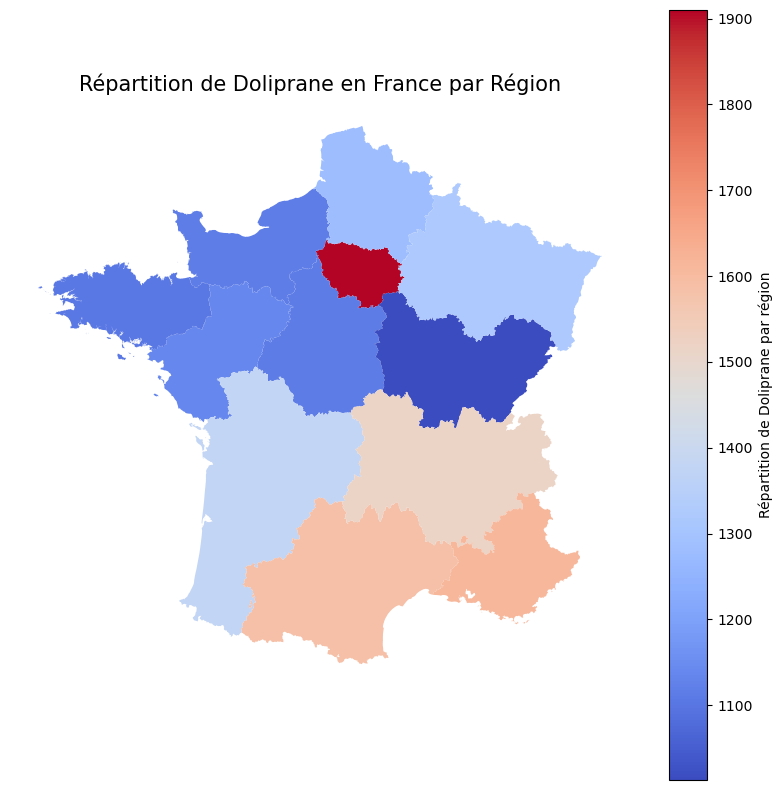

  code                      nom  \
0   11            Île-de-France   
1   24      Centre-Val de Loire   
2   27  Bourgogne-Franche-Comté   
3   28                Normandie   
4   32          Hauts-de-France   

                                            geometry              Region_Name  \
0  POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...            Île-de-France   
1  POLYGON ((2.87463 47.52042, 2.87984 47.51671, ...      Centre-Val de Loire   
2  POLYGON ((3.62942 46.74946, 3.62655 46.75228, ...  Bourgogne-Franche-Comté   
3  MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49...                Normandie   
4  POLYGON ((4.14090 49.97876, 4.14407 49.97625, ...          Hauts-de-France   

   count  
0   1910  
1   1113  
2   1013  
3   1118  
4   1278  
0                  Île-de-France
1            Centre-Val de Loire
2        Bourgogne-Franche-Comté
3                      Normandie
4                Hauts-de-France
5                      Grand Est
6               Pays de la Loire
7    

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier GeoJSON
gdf_regions = gpd.read_file('regions.geojson')

# Si vous avez déjà un DataFrame appelé 'df_doliprane' avec une colonne 'Region_Name' et des données sur Doliprane,
# assurez-vous que les données sont groupées par région et que vous avez une statistique à afficher (comme le nombre de boîtes)
df_doliprane_grouped = df_doliprane.groupby('Region_Name').size().reset_index(name='count')

# Joindre le DataFrame groupé avec le GeoDataFrame sur les noms de région
gdf_regions = gdf_regions.merge(df_doliprane_grouped, left_on='nom', right_on='Region_Name', how='left')

# Remplacer les valeurs NaN par 0 si nécessaire
gdf_regions['count'] = gdf_regions['count'].fillna(0)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_regions.plot(column='count', ax=ax, legend=True,
                 legend_kwds={'label': "Répartition de Doliprane par région"},
                 cmap='coolwarm')  # Ou toute autre colormap de votre choix

# Améliorations esthétiques
ax.axis('off')
ax.set_title('Répartition de Doliprane en France par Région', fontdict={'fontsize': '15', 'fontweight' : '3'})

plt.show()
print(gdf_regions.head())

# Pour afficher spécifiquement les noms des régions, trouvez la colonne qui contient ces noms
# et affichez-la. Par exemple, si la colonne s'appelle 'nom':
print(gdf_regions['nom'])
